<h1 style="font-size:35px;">Data Science Intern Challenge</h1>

### By Sophie Ngo 

<h1 style="font-size:30px;">Question 1a</h1> 

### Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

## Preparation

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
orders_df = pd.read_csv('/Users/sophie/Desktop/orders.csv')

In [3]:
orders_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


### Look for nulls or missing values in the data. 

In [4]:
orders_df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

### Find any duplicates. 

In [6]:
duplicates_orders_df = orders_df[orders_df.duplicated()]
print(duplicates_orders_df)

Empty DataFrame
Columns: [order_id, shop_id, user_id, order_amount, total_items, payment_method, created_at]
Index: []


There are no duplicates according to the output above. 

### Short Exploratory Data Analysis 

**1. shop_id**: Each shop is identified with a unique number. 

In [13]:
orders_df['shop_id'].describe()

count    5000.000000
mean       50.078800
std        29.006118
min         1.000000
25%        24.000000
50%        50.000000
75%        75.000000
max       100.000000
Name: shop_id, dtype: float64

**2. user_id**: Each customer has a unique number for references.  

In [14]:
orders_df['user_id'].describe()

count    5000.000000
mean      849.092400
std        87.798982
min       607.000000
25%       775.000000
50%       849.000000
75%       925.000000
max       999.000000
Name: user_id, dtype: float64

**3. order_amount**: It is the amount of money spent for that one particular transaction. **The AOV is the mean seen below.**

In [15]:
orders_df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

**4. total_items**: The number of items that were purchased for that order. 

In [16]:
orders_df['total_items'].describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

**5. payment_method**: This is the method of preferred payment. 

In [17]:
orders_df['payment_method'].describe()

count            5000
unique              3
top       credit_card
freq             1735
Name: payment_method, dtype: object

**6. created_at**: This is when the transaction took place. 

In [18]:
orders_df['created_at'].describe()

count                   5000
unique                  4991
top       2017-03-28 4:00:00
freq                       3
Name: created_at, dtype: object

## Answering the Question

### Graph Each Order Value 

Text(0.5, 1.0, 'Order Amount per Order')

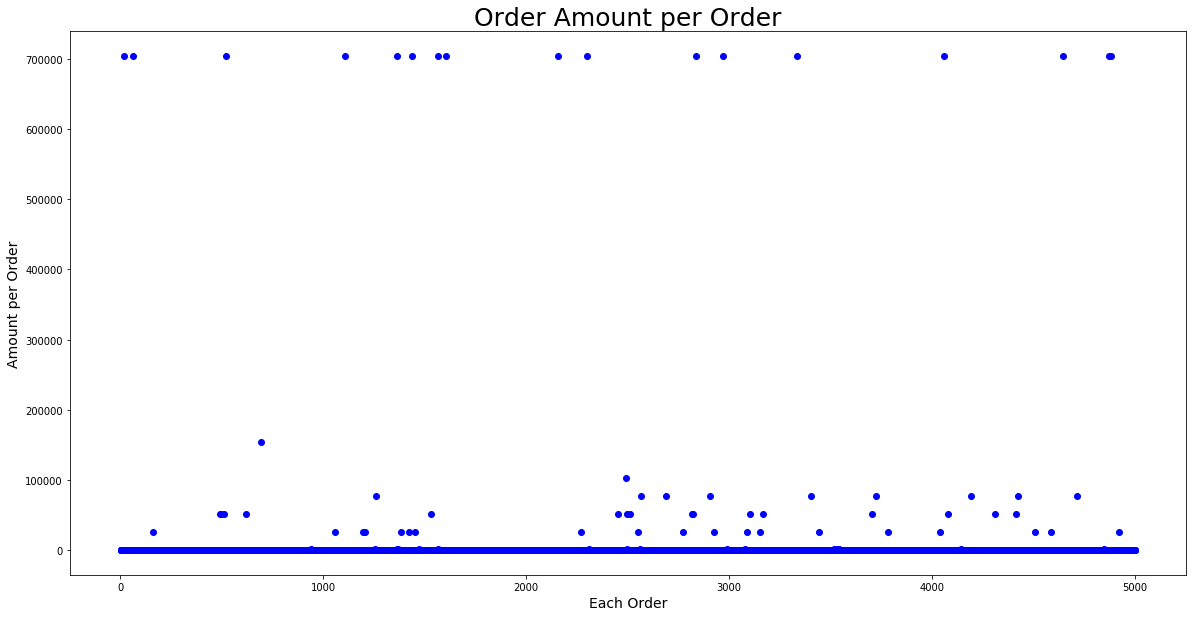

In [39]:
plt.figure(figsize=(20,10))
plt.scatter(orders_df['order_id'], orders_df['order_amount'], color='blue')
plt.xlabel('Each Order', size=14)
plt.ylabel('Amount per Order', size=14)
plt.title('Order Amount per Order', size=25)

## Based on the graph above, it looks like the majority of order values are close to zero. There are a set of outliers around the 700 000 mark as well as outliers between 1000 to 200 000. This suggests that we should filter out the outliers. 

In [41]:
orders_df[orders_df['order_amount'] > 700000].count()
## There are 17 orders over 700 000 dollars.

order_id          17
shop_id           17
user_id           17
order_amount      17
total_items       17
payment_method    17
created_at        17
dtype: int64

## See what's the AOV for orders amount under 700 000 dollars. 

In [52]:
orders_under_700k = orders_df[orders_df['order_amount'] < 700000]

In [54]:
orders_under_700k.describe()
## The AOV for under 700 000 dollars is 754.09. 

,order_id,shop_id,user_id,order_amount,total_items
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.00000
mean,2501.060405,50.106362,849.918322,754.091913,1.99398
std,1443.090253,29.051718,86.800308,5314.092293,0.98318
min,1.000000,1.000000,700.000000,90.000000,1.00000
25%,1250.500000,24.000000,776.000000,163.000000,1.00000
50%,2502.000000,50.000000,850.000000,284.000000,2.00000
75%,3750.500000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,154350.000000,8.00000


## Showing orders under 700 000 dollars

In [42]:
orders_under_700k_df = orders_df[orders_df['order_amount'] < 700000]

Text(0.5, 1.0, 'Order Amount per Order')

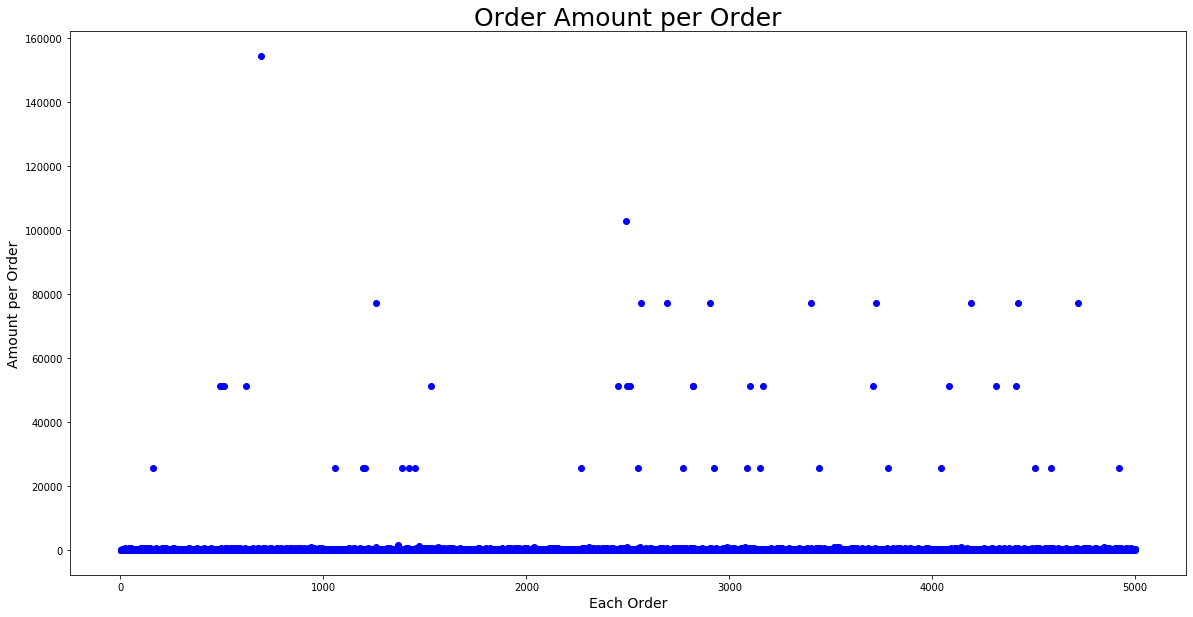

In [43]:
plt.figure(figsize=(20,10))
plt.scatter(orders_under_700k_df['order_id'], orders_under_700k_df['order_amount'], color='blue')
plt.xlabel('Each Order', size=14)
plt.ylabel('Amount per Order', size=14)
plt.title('Order Amount per Order', size=25)

## If I filter out the outliers that have order values under 20 000 dollars, it will most likely change the AOV.

In [59]:
orders_df[orders_df['order_amount'] > 20000].count()
## There are 63 orders over 20 000 dollars.

order_id          63
shop_id           63
user_id           63
order_amount      63
total_items       63
payment_method    63
created_at        63
dtype: int64

## Illustrating orders that are under 20 000 dollars. 

In [56]:
orders_under_20k = orders_df[orders_df['order_amount'] < 20000]

Text(0.5, 1.0, 'Order Amount per Order')

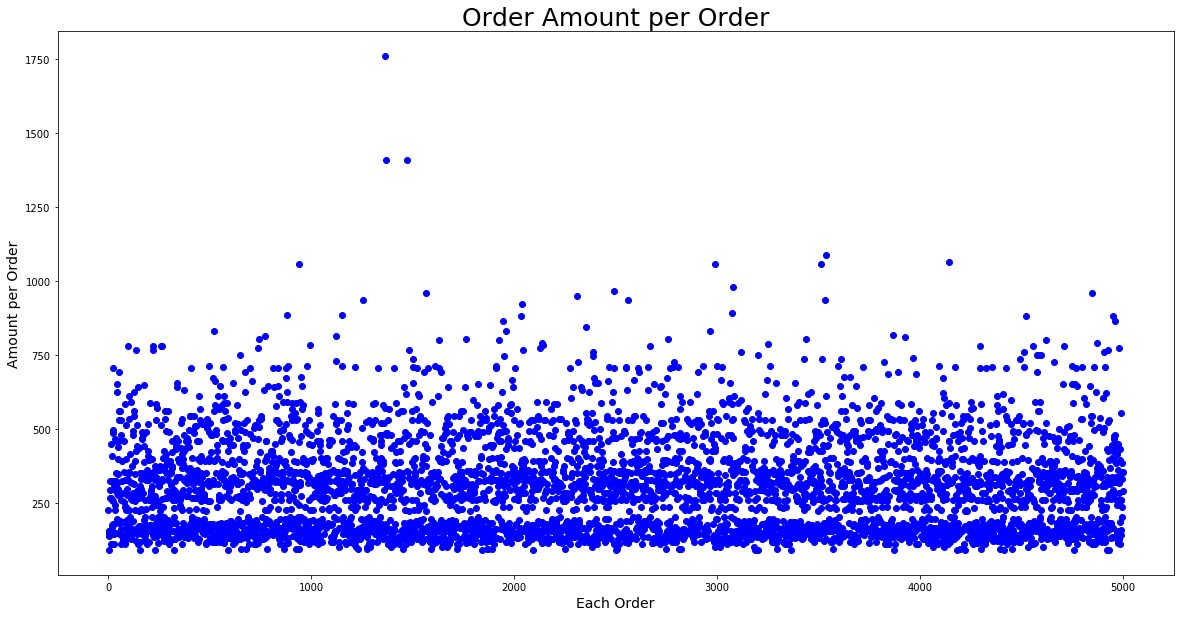

In [57]:
plt.figure(figsize=(20,10))
plt.scatter(orders_under_20k['order_id'], orders_under_20k['order_amount'], color='blue')
plt.xlabel('Each Order', size=14)
plt.ylabel('Amount per Order', size=14)
plt.title('Order Amount per Order', size=25)

In [58]:
orders_under_20k.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


# Attaining the Average Cost per Shoe

In [60]:
orders_under_20k.insert(4, "Average Cost Per Item", "Average Cost Per Item")

In [63]:
orders_under_20k['Average Cost Per Item'] = orders_under_20k['order_amount']/orders_under_20k['total_items'] 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
orders_under_20k.head()

,order_id,shop_id,user_id,order_amount,Average Cost Per Item,total_items,payment_method,created_at
0,1,53,746,224,112.0,2,cash,2017-03-13 12:36:56
1,2,92,925,90,90.0,1,cash,2017-03-03 17:38:52
2,3,44,861,144,144.0,1,cash,2017-03-14 4:23:56
3,4,18,935,156,156.0,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,156.0,1,credit_card,2017-03-01 4:35:11


In [65]:
orders_under_20k.describe()

,order_id,shop_id,user_id,order_amount,Average Cost Per Item,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,151.788536,1.994734
std,1444.069407,29.061131,86.840313,160.804912,29.034215,0.982821
min,1.000000,1.000000,700.000000,90.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,132.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,153.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,166.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,352.000000,8.000000


<h1 style="font-size:30px;"> Question 1b</h1> 

## What metric would you report for this dataset?

The metric that are useful for this dataset would be the **mean of the order amount for orders under 20 000 dollars (AOV)**, and **standard deviation of those orders**. The reason is because I want to know the average order value and the variance of the average order value. For example, if I am setting up a shoe shop, I would like to know what is the range I should price my shoes.  

The reason why I filtered out the orders above 20 000 dollars is because the bigger order values are most likely made by an organization since the order values are large and systematic based on the graph. The original graph shows patterns for larger orders. In order to attain a more accurate average order value, it is best to filter out the values above 20 000 dollars. 

Another important metric to consider is the **average cost per item** since we do not know how many shoes were purchase in each AOV. Computing the average cost per shoe for each order would add value to customer analysis.   

<h1 style="font-size:30px;"> Question 1c</h1> 

## What is its value?

**Mean of the order amount for orders under 20 000 dollars (AOV)** : 302.580514	<br>
**Standard deviation of those orders** : 160.804912 <br>
**Average cost per item**: 151.79 <br>

<h1 style="font-size:30px;"> Question 2a</h1> 

## How many orders were shipped by Speedy Express in total?

https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL

With the link above I answered the following questions. 

I prefer subqueries because they tend to be faster. 

- I find the ShipperID number of Speedy Express 
- Then I count all the orders using Speedy Express’s ShipperID 


<h3 style="color:blue;"> SELECT COUNT(*) <br>
FROM Orders <br>
WHERE ShipperID = (SELECT ShipperID <br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$FROM Shippers <br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$WHERE ShipperName="Speedy Express"); </h3> 

<h1 style="font-size:30px;"> Question 2b</h1> 

## What is the last name of the employee with the most orders?

- The subquery determines the EmployeeID with the most orders
- Then I retrieve the last name of the employee with the most orders using the EmployeeID from the subquery


<h3 style="color:blue;"> SELECT LastName <br>
FROM Employees <br>
WHERE EmployeeID = (SELECT EmployeeID <br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$FROM Orders <br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$GROUP BY EmployeeID <br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ORDER BY COUNT(OrderID) DESC <br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$LIMIT 1); </h3> 

<h1 style="font-size:30px;"> Question 2c</h1> 

## What product was ordered the most by customers in Germany?

Step by Step: 

- Figure out the CustomerID of those who are from Germany using the Customers Table
- Join OrderID from the order table to the Customers Table using CustomerID 
- Join the OrderDetail Table to the Customer Table using OrderID 
- Join the Products Table to the Customers Table using ProductID 
- Add the total quantity for each ProductID 
- Find the product name with the largest quantity 

<h3 style="color:blue;"> 
SELECT <br>
$\;\;$p."ProductName", <br> 
$\;\;$SUM(od."Quantity") AS "Total Quantity" <br>
FROM Customers c <br>
JOIN Orders o <br>
$\;\;$ON o."CustomerID" = c."CustomerID" <br>
JOIN OrderDetails od <br>
$\;\;$ON od."OrderID" = o."OrderID" <br>
JOIN Products p <br>
$\;\;$ON p."ProductID" = od."ProductID" <br>
WHERE c."Country" = 'Germany' <br>
GROUP BY p."ProductName" <br>
ORDER BY "Total Quantity" DESC <br>
LIMIT 1;
 </h3> 

<h1 style="font-size:30px;"> Thank You For Your Time </h1> 